In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("./train_origin.csv")
test = pd.read_csv("./test_origin.csv")
train_id = train["train_id"]
target = train["dbh"]
train = train.drop(["dbh","train_id"],axis=1)
test_id = test["test_id"]
test = test.drop(["test_id"],axis=1)
print(train.describe())

            max_h       min_h      mean_h        sd_h         sum_h  \
count  100.000000  100.000000  100.000000  100.000000    100.000000   
mean    31.256400   13.551000   25.116951    4.080438   3434.404894   
std      6.669115    7.094876    6.062526    1.764470   2177.420502   
min     21.010000    5.100000   14.525690    0.520348    243.139998   
25%     25.505000    8.372500   20.403993    2.917439   1873.557498   
50%     30.705000   11.980000   23.497401    3.866057   3170.640000   
75%     35.872500   16.355000   29.329508    5.200860   4608.217491   
max     47.230000   38.259998   40.867333    9.411008  11451.179980   

       crown_area  crown_perim  
count   100.00000   100.000000  
mean     22.13120    25.992000  
std      12.88846     9.234451  
min       2.08000     1.600000  
25%      12.28000    20.800000  
50%      20.16000    26.400000  
75%      29.48000    32.800000  
max      65.44000    45.600000  


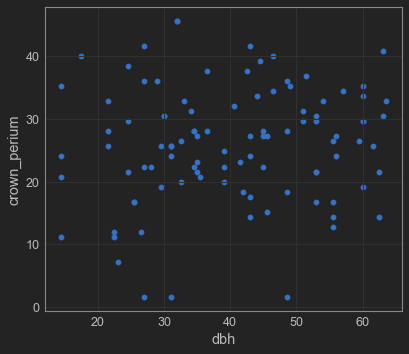

In [8]:
import matplotlib.pyplot as plt
x = target
y = train["crown_perim"]
plt.scatter(x,y)
plt.xlabel("dbh")
plt.ylabel("crown_perium")
plt.show()

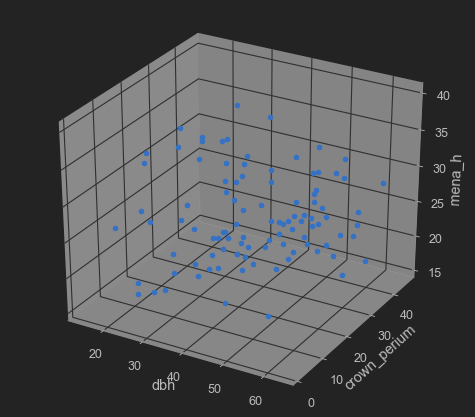

In [9]:
x = target
y = train["crown_perim"]
z = train["mean_h"]
from mpl_toolkits.mplot3d import Axes3D

#グラフの枠を作っていく
fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("dbh")
ax.set_ylabel("crown_perium")
ax.set_zlabel("mena_h")

#.plotで描画
#linestyle='None'にしないと初期値では線が引かれるが、3次元の散布図だと大抵ジャマになる
#markerは無難に丸
ax.plot(x,y,z,marker="o",linestyle='None')

#最後に.show()を書いてグラフ表示
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

kf = KFold(n_splits=100,random_state=0)
rmse = []
pred = []

for X_index, Y_index in kf.split(train):
    X_train, X_valid = train.loc[X_index], target.loc[X_index]
    Y_train, Y_valid = train.loc[Y_index], target.loc[Y_index]
    regr = LinearRegression(normalize=False,)
    regr.fit(X_train,X_valid)
    predict = regr.predict(Y_train)
    rmse.append(np.sqrt(mean_squared_error(predict,Y_valid)))
    pred.append(regr.predict(test))
    
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
print("RMSE: ", mean(rmse))
predict = np.mean(pred,axis=0)
print(predict)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Intercept: 13.724071193356856
Coefficients:  [ 1.88768937 -0.38763488 -0.5398257  -3.25913333 -0.00401134  0.67503618
 -0.05430402]
RMSE:  11.718302573096064
[34.1468573  28.87331281 33.55873986 31.62302973 25.8683465  36.31146512
 31.71215209 29.9385822  28.95071987 30.06358293 29.94254855 31.71124625
 34.67364134 26.21833136 26.7595286  26.82871749 27.66949324 25.45574583
 30.0323645  25.68698944 26.11016688 25.12911567 23.60956579 28.16579437
 19.11518216]


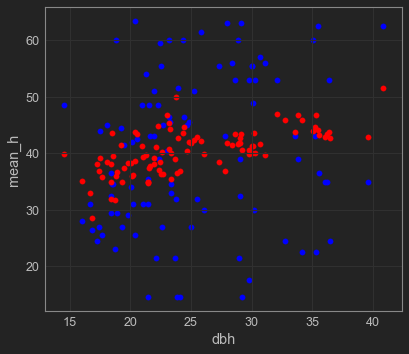

In [33]:
plt.scatter(train["mean_h"],target,color="blue")
plt.scatter(train["mean_h"],regr.predict(train),color="red")
plt.xlabel("dbh")
plt.ylabel("mean_h")
plt.show()

In [34]:
pred = pd.DataFrame()
pred["Id"] = test_id
pred["dbh"] = predict.round(2)
pred.to_csv("DBH_SGDR_Uid2.csv", index=False)